In [28]:
cd drive

[Errno 2] No such file or directory: 'drive'
/content/drive/My Drive/Plate_detect_and_recognize-master


In [5]:
cd My\ Drive

/content/drive/My Drive


In [6]:
cd Plate_detect_and_recognize-master/

/content/drive/My Drive/Plate_detect_and_recognize-master


In [17]:
# remove warning message
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

# required library
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from utils import detect_lp
from os.path import splitext,basename
from keras.models import model_from_json
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.mobilenet_v2 import preprocess_input
from sklearn.preprocessing import LabelEncoder
import glob
import math

### Part 1: Extract license plate from sample image

In [8]:
def load_model(path):
    try:
        path = splitext(path)[0]
        with open('%s.json' % path, 'r') as json_file:
            model_json = json_file.read()
        model = model_from_json(model_json, custom_objects={})
        model.load_weights('%s.h5' % path)
        print("Loading model successfully...")
        return model
    except Exception as e:
        print(e)

In [9]:
wpod_net_path = "wpod-net.json"
wpod_net = load_model(wpod_net_path)

Loading model successfully...


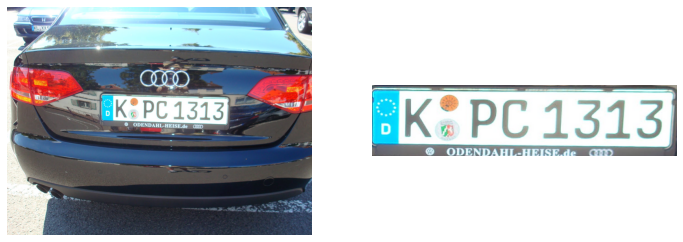

In [60]:
def preprocess_image(image_path,resize=False):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img / 255
    if resize:
        img = cv2.resize(img, (224,224))
    return img

def get_plate(image_path):
    Dmax = 608
    Dmin = 288
    vehicle = preprocess_image(image_path)
    ratio = float(max(vehicle.shape[:2])) / min(vehicle.shape[:2])
    side = int(ratio * Dmin)
    bound_dim = min(side, Dmax)
    _ , LpImg, _, cor = detect_lp(wpod_net, vehicle, bound_dim, lp_threshold=0.5)
    return vehicle, LpImg, cor

test_image_path = "Plate_examples/photo2.JPG"
test_image_path = "Plate_examples/germany_car_plate.jpg"
vehicle, LpImg,cor = get_plate(test_image_path)

fig = plt.figure(figsize=(12,6))
grid = gridspec.GridSpec(ncols=2,nrows=1,figure=fig)
fig.add_subplot(grid[0])
plt.axis(False)
plt.imshow(vehicle)
grid = gridspec.GridSpec(ncols=2,nrows=1,figure=fig)
fig.add_subplot(grid[1])
plt.axis(False)
plt.imshow(LpImg[0])

In [61]:
def getBinaryImage(image):
  print(image)
  return
  b = image.copy()
  b = b[:, :, 0]
  plt.imshow(b)
  y = math.floor(b.shape[0]/2.4)
  x = math.floor(b.shape[1]/9)
  crop_img = b[y:int(y*2), x:int(x*8.3)]
  plt.imshow(crop_img)
  flatArray = b.flatten()
  cangeV =  np.percentile(flatArray, [32])
  image = b
  print(image)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  # convert to grayscale
  gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
  _, binary = cv2.threshold(gray, cangeV, cangeV, cv2.THRESH_BINARY_INV)
  # show it
  plt.imshow(binary, cmap="gray")
  plt.show()

getBinaryImage(LpImg[0])

[[[0.64048713 0.67602635 0.64220282]
  [0.56151961 0.60003064 0.56875   ]
  [0.53777574 0.58514093 0.55484069]
  ...
  [0.55741422 0.54307598 0.54178922]
  [0.55184589 0.55061275 0.54361213]
  [0.55147059 0.55343137 0.54705882]]

 [[0.6673943  0.66861979 0.64825368]
  [0.59154412 0.59552696 0.58241422]
  [0.4915671  0.50186121 0.50739124]
  ...
  [0.65490196 0.60391391 0.59093137]
  [0.65965839 0.60110294 0.59056373]
  [0.66348039 0.59926471 0.59019608]]

 [[0.51614583 0.5651731  0.55243566]
  [0.39926471 0.44315257 0.44192708]
  [0.29208027 0.33455116 0.34768689]
  ...
  [0.62637485 0.61308594 0.56875   ]
  [0.63536305 0.6082644  0.56887255]
  [0.64065564 0.60566789 0.5667739 ]]

 ...

 [[0.43823529 0.41862745 0.41666667]
  [0.4539905  0.43629366 0.42921262]
  [0.45121783 0.4339231  0.43080576]
  ...
  [0.20407475 0.22074142 0.26862745]
  [0.17394301 0.20326287 0.24690564]
  [0.21334635 0.24229473 0.25185355]]

 [[0.42089461 0.40422794 0.40079657]
  [0.41855086 0.40225184 0.39710478]


## Part 2: Segementing license characters

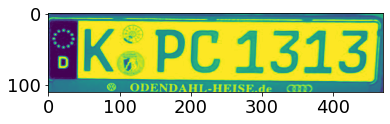

In [80]:
def binaryImage(image):
  possibleImages = []
  # image = cv2.imread("color2.png")
  copy = image.copy()
#   # return copy.shape
  b = copy[:, :, 0]
  plt.imshow(b)
  y = math.floor(b.shape[0]/2.4)
  x = math.floor(b.shape[1]/9)
  crop_img = b[y:int(y*2), x:int(x*8.3)]
  # plt.imshow(crop_img)
  b = cv2.GaussianBlur(b,(7,7),0)
  flatArray = b.flatten()
  cangeV =  np.percentile(flatArray, [32])
  image = cv2.cvtColor(b, cv2.COLOR_BGR2RGB)
  # # convert to grayscale
  gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
  _, binary = cv2.threshold(gray, cangeV, cangeV, cv2.THRESH_BINARY_INV)


  # possibleImages.append(binary)

  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  blur = cv2.GaussianBlur(gray,(7,7),0)
  
  # Applied inversed thresh_binary 
  binary = cv2.threshold(blur, 180, 255,
                        cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
  
  kernel3 = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
  thre_mor = cv2.morphologyEx(binary, cv2.MORPH_DILATE, kernel3)

  possibleImages.append([gray, blur, binary, kernel3, thre_mor])

  

  return possibleImages
  # # # show it
  # plt.imshow(binary, cmap="gray")
  # plt.show()

if (len(LpImg)): #check if there is at least one license image
    # Scales, calculates absolute values, and converts the result to 8-bit.
    plate_image = cv2.convertScaleAbs(LpImg[0], alpha=(255.0))
    possibleImages = binaryImage(plate_image)

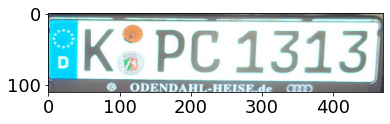

In [78]:
gray = possibleImages[0][0]
blur = possibleImages[0][1]
binary = possibleImages[0][2]
kernel3 = possibleImages[0][3]
thre_mor = possibleImages[0][4]

# plt.imshow(plate_image)

Detect 1 letters...


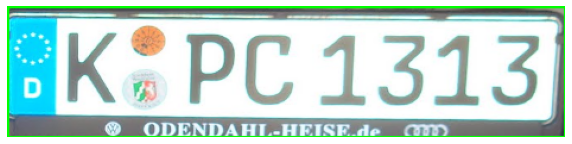

In [79]:
# Create sort_contours() function to grab the contour of each digit from left to right
def sort_contours(cnts,reverse = False):
    i = 0
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
                                        key=lambda b: b[1][i], reverse=reverse))
    return cnts

cont, _  = cv2.findContours(thre_mor, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# creat a copy version "test_roi" of plat_image to draw bounding box
test_roi = plate_image.copy()

# Initialize a list which will be used to append charater image
crop_characters = []

# define standard width and height of character
digit_w, digit_h = 30, 60

for c in sort_contours(cont):
    (x, y, w, h) = cv2.boundingRect(c)
    ratio = h/w
    # if 1<=ratio<=3.5: # Only select contour with defined ratio
    if h/plate_image.shape[0]>=0.5: # Select contour which has the height larger than 50% of the plate
        # Draw bounding box arroung digit number
        cv2.rectangle(test_roi, (x, y), (x + w, y + h), (0, 255,0), 2)

        # Sperate number and gibe prediction
        curr_num = thre_mor[y:y+h,x:x+w]
        curr_num = cv2.resize(curr_num, dsize=(digit_w, digit_h))
        _, curr_num = cv2.threshold(curr_num, 220, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        crop_characters.append(curr_num)



print("Detect {} letters...".format(len(crop_characters)))
fig = plt.figure(figsize=(10,6))
plt.axis(False)
plt.imshow(test_roi)
#plt.savefig('grab_digit_contour.png',dpi=300)


Detect 0 letters...


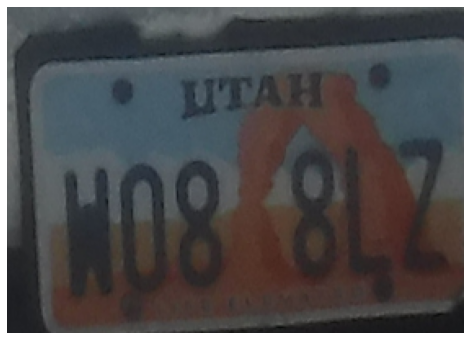

In [53]:
# Create sort_contours() function to grab the contour of each digit from left to right
def sort_contours(cnts,reverse = False):
    i = 0
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
                                        key=lambda b: b[1][i], reverse=reverse))
    return cnts

cont, _  = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# creat a copy version "test_roi" of plat_image to draw bounding box
test_roi = plate_image.copy()

# Initialize a list which will be used to append charater image
crop_characters = []

# define standard width and height of character
digit_w, digit_h = 30, 60

for c in sort_contours(cont):
    (x, y, w, h) = cv2.boundingRect(c)
    ratio = h/w
    if 1<=ratio<=3.5: # Only select contour with defined ratio
        if h/plate_image.shape[0]>=0.5: # Select contour which has the height larger than 50% of the plate
            # Draw bounding box arroung digit number
            cv2.rectangle(test_roi, (x, y), (x + w, y + h), (0, 255,0), 2)

            # Sperate number and gibe prediction
            curr_num = thre_mor[y:y+h,x:x+w]
            curr_num = cv2.resize(curr_num, dsize=(digit_w, digit_h))
            _, curr_num = cv2.threshold(curr_num, 220, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
            crop_characters.append(curr_num)

print("Detect {} letters...".format(len(crop_characters)))
fig = plt.figure(figsize=(10,6))
plt.axis(False)
plt.imshow(test_roi)
#plt.savefig('grab_digit_contour.png',dpi=300)

In [18]:
fig = plt.figure(figsize=(14,4))
grid = gridspec.GridSpec(ncols=len(crop_characters),nrows=1,figure=fig)

for i in range(len(crop_characters)):
    fig.add_subplot(grid[i])
    plt.axis(False)
    plt.imshow(crop_characters[i],cmap="gray")
#plt.savefig("segmented_leter.png",dpi=300)    

<Figure size 1008x288 with 0 Axes>

## Load pre-trained MobileNets model and predict

In [19]:
# Load model architecture, weight and labels
json_file = open('MobileNets_character_recognition.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
model.load_weights("License_character_recognition_weight.h5")
print("[INFO] Model loaded successfully...")

labels = LabelEncoder()
labels.classes_ = np.load('license_character_classes.npy')
print("[INFO] Labels loaded successfully...")

[INFO] Model loaded successfully...
[INFO] Labels loaded successfully...


In [20]:
# pre-processing input images and pedict with model
def predict_from_model(image,model,labels):
    image = cv2.resize(image,(80,80))
    image = np.stack((image,)*3, axis=-1)
    prediction = labels.inverse_transform([np.argmax(model.predict(image[np.newaxis,:]))])
    return prediction

In [22]:
fig = plt.figure(figsize=(15,3))
cols = len(crop_characters)
grid = gridspec.GridSpec(ncols=cols,nrows=1,figure=fig)

final_string = ''
for i,character in enumerate(crop_characters):
    fig.add_subplot(grid[i])
    title = np.array2string(predict_from_model(character,model,labels))
    plt.title('{}'.format(title.strip("'[]"),fontsize=20))
    final_string+=title.strip("'[]")
    plt.axis(False)
    plt.imshow(character,cmap='gray')

print(final_string)
#plt.savefig('final_result.png', dpi=300)

<Figure size 1080x216 with 0 Axes>

# The end!